## 1. Import package 

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 2. Load data 

In [2]:
#Setting wd
import os
os.chdir("D:\Stephen Adebisi\Machine Learning\Assignment_3")

# Reading the dataset

data = r"D:\Stephen Adebisi\Machine Learning\Assignment_3\House_price_data_multiple_variable.xlsx"
df = pd.read_excel(data, sheet_name = 'all_data_points')

# Displaying Data
df



,Price,Area,Bedrooms,Bathrooms,Stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2
...,...,...,...,...,...
540,1820000,3000,2,1,1
541,1767150,2400,3,1,1
542,1750000,3620,2,1,1
543,1750000,2910,3,1,1


In [3]:
# Defining independent and dependent variables

X = df.drop('Price', axis=1).values
Y = df['Price'].values


In [4]:
X


array([[7420,    4,    2,    3],
       [8960,    4,    4,    4],
       [9960,    3,    2,    2],
       ...,
       [3620,    2,    1,    1],
       [2910,    3,    1,    1],
       [3850,    3,    1,    2]])

In [5]:
Y

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

## 3. Split the data to training and testing sets (70%:30%) 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=1
)


In [9]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)


X_train: (381, 4)
X_test: (164, 4)
Y_train: (381,)
Y_test: (164,)


##  4. House Price Prediction Model  Training (Linear regression algorithm)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Coefficients: [3.56039848e+02 1.19297181e+05 1.24689569e+06 5.36079087e+05]
Intercept: -15222.746254468337


## Model Equation

Y = (356.039848 * X1
     + 119297.181 * X2
     + 1246895.69 * X3
     + 536079.087 * X4
     - 15222.746254468337)

where:
X1 = Area
X2 = Bedrooms
X3 = Bathrooms
X4 = Stories


## 5. House Price Prediction Model  Testing (evaluation or assessment)
** calculate MSE, RMSE, RMSE% and R-squred

** visulize the testing results using line plot and 1:1 scatter plot

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

Y_pred_test = model.predict(X_test)

MSE = mean_squared_error(Y_test, Y_pred_test)
RMSE = np.sqrt(MSE)
RRMSE = (RMSE / np.mean(Y_test)) * 100
R2 = r2_score(Y_test, Y_pred_test)

print("MSE:", MSE)
print("RMSE:", RMSE)
print("RRMSE:", RRMSE)
print("R2:", R2)








MSE: 1936272230125.7637
RMSE: 1391499.9928587005
RRMSE: 29.312967927912403
R2: 0.5243084136732481


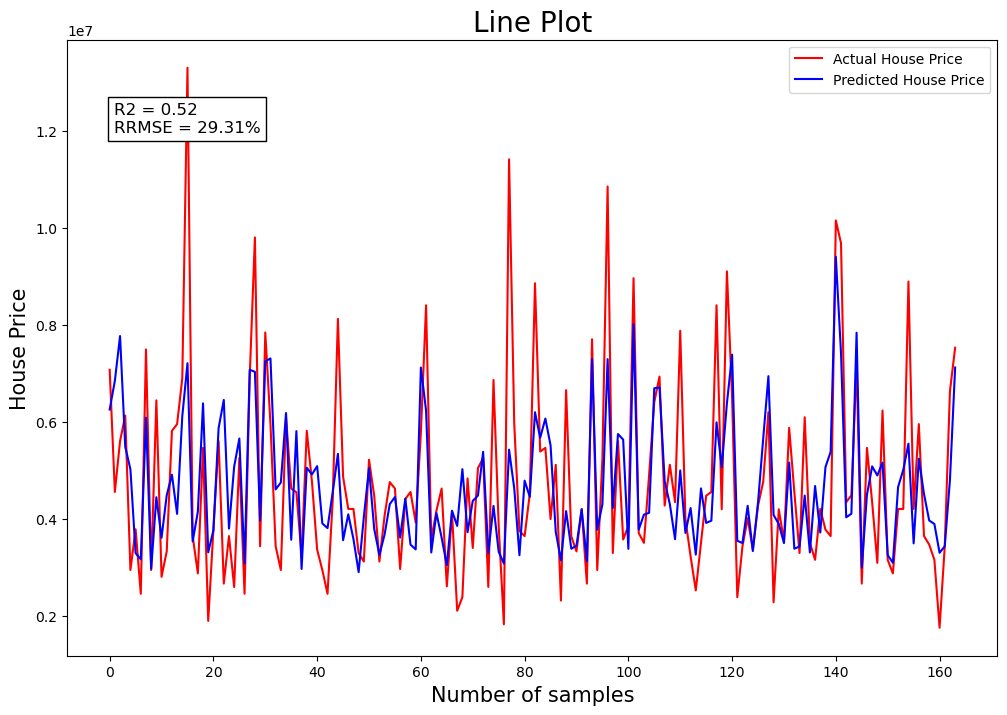

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

# Plot actual and predicted
ax.plot(Y_test, color='red', label='Actual House Price')
ax.plot(Y_pred_test, color='blue', label='Predicted House Price')

# Add performance text
text = "R2 = %.2f" % (R2)
text += "\n"
text += "RRMSE = %.2f%%" % (RRMSE)

plt.annotate(text,
             xy=(0.05, 0.85),
             xycoords='axes fraction',
             fontsize=12,
             bbox=dict(facecolor='white', edgecolor='black'))

# Labels and title
ax.set_xlabel('Number of samples', fontsize=15)
ax.set_ylabel('House Price', fontsize=15)
ax.set_title('Line Plot', fontsize=20)

ax.legend()
plt.show()


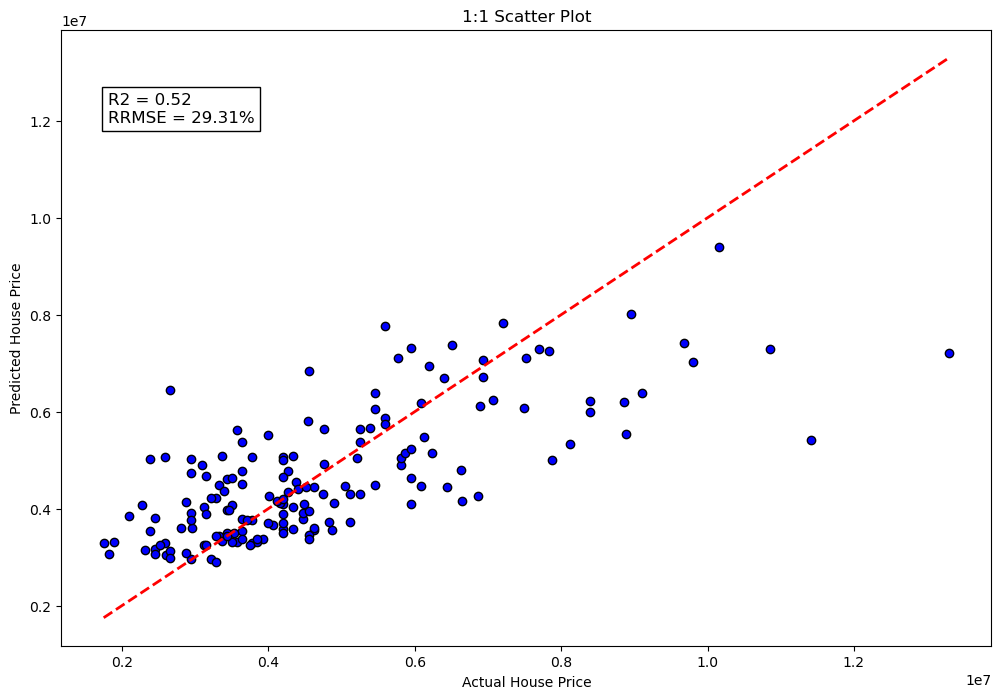

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(Y_test, Y_pred_test, color='b', edgecolors=(0,0,0))

min_val = min(Y_test.min(), Y_pred_test.min())
max_val = max(Y_test.max(), Y_pred_test.max())
padding = 0.05 * (max_val - min_val)

ax.set_xlim(min_val - padding, max_val + padding)
ax.set_ylim(min_val - padding, max_val + padding)

ax.plot([min_val, max_val],
        [min_val, max_val],
        'r--', lw=2)

# 🔹 Add Metrics Box
text = "R2 = %.2f" % (R2)
text += "\n"
text += "RRMSE = %.2f%%" % (RRMSE)

ax.annotate(text,
            xy=(0.05, 0.85),
            xycoords='axes fraction',
            fontsize=12,
            bbox=dict(facecolor='white', edgecolor='black'))

ax.set_xlabel('Actual House Price')
ax.set_ylabel('Predicted House Price')
ax.set_title('1:1 Scatter Plot')

plt.show()
